In [13]:
# === IMPORTS ===
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import importlib
import os
import sys

# Add current directory to Python path
current_dir = os.path.dirname(os.path.abspath('__file__'))
if current_dir not in sys.path:
    sys.path.append(current_dir)
    print(f"✅ Current directory added to PYTHONPATH: {current_dir}")

# Check if all external modules are present
required_modules = ['ollama_server', 'model_manager', 'benchmark_core', 'visualization', 'model_benchmark_utils']
missing_modules = []

for module in required_modules:
    try:
        importlib.import_module(module)
    except ImportError:
        missing_modules.append(module)

if missing_modules:
    print(f"\n❌ Missing modules: {', '.join(missing_modules)}")
    print("Make sure all required Python modules are present in the same directory as this notebook.")
    # If modules are missing, inform the user but don't abort
else:
    print("✅ All required modules are present.")

# Import functions from external modules
from ollama_server import check_ollama_server, start_ollama_server
from model_manager import check_model_exists, load_model
from benchmark_core import benchmark_model, run_benchmark
from visualization import visualize_results
from model_benchmark_utils import run_benchmark_test

# Optional: Reload modules to ensure the latest versions are used
importlib.reload(importlib.import_module('ollama_server'))
importlib.reload(importlib.import_module('model_manager'))
importlib.reload(importlib.import_module('benchmark_core'))
importlib.reload(importlib.import_module('visualization'))
importlib.reload(importlib.import_module('model_benchmark_utils'))

✅ All required modules are present.


<module 'model_benchmark_utils' from 'c:\\Users\\Marc\\Desktop\\benchmark\\stonks\\project\\DeepLearningProject\\Benchmark\\model_benchmark_utils.py'>

# LLM Benchmark Framework - Quick Start

This notebook provides a **quick and simple** way to compare language models using Ollama. For comprehensive testing, use the `detailed_tests.ipynb` notebook.

## 🎯 Quick Benchmark Features:
- **Simple Setup**: Basic model comparison with minimal configuration
- **Fast Testing**: Quick evaluation across fundamental tasks
- **External Prompts**: Test prompts loaded from `test_prompts.json`
- **Easy to Use**: Perfect for initial model comparison

## 📁 Project Structure:
- **`model_benchmark.ipynb`** ← *You are here* - Quick basic benchmarking
- **`detailed_tests.ipynb`** - Comprehensive testing across all capabilities
- **`test_prompts.json`** - External test prompt storage
- **`.py files`** - Core functionality modules

## 🚀 Getting Started:
1. Configure your models in the cell below
2. Run the benchmark
3. Review basic results
4. Use `detailed_tests.ipynb` for comprehensive evaluation

In [16]:
# === EXPANDED BENCHMARK CONFIGURATION ===
import json

# Ollama API URL
OLLAMA_API_URL = "http://localhost:11434/api"

# === YOUR AVAILABLE MODELS (Expanded Collection for Intel Core i5-1340P) ===
# All models are optimized for efficient local processing on your system
MODELS = [
    "deepseek-r1:1.5b",      # ✅ Installed - Advanced reasoning model (1.1 GB)
    "llama3.2:latest",       # ✅ Installed - All-around performance model (2.0 GB)
    "qwen2.5:1.5b",          # ✅ Installed - Qwen 2.5 efficient model (986 MB)
    "tinyllama:1.1b",        # ✅ NEW - Ultra-lightweight & fast (637 MB)
    "deepseek-coder:1.3b",   # ✅ NEW - Coding specialist (776 MB)
    "phi3:3.8b"              # ✅ NEW - Microsoft's balanced model (2.2 GB)
]

print("🎉 EXPANDED MODEL COLLECTION - Perfect for Intel Core i5-1340P!")
print("=" * 65)
print("🧠 REASONING & GENERAL:")
print("   ✅ deepseek-r1:1.5b    - Specialized reasoning (1.1 GB)")
print("   ✅ llama3.2:latest     - Excellent all-around (2.0 GB)")
print("   ✅ qwen2.5:1.5b        - Efficient multilingual (986 MB)")
print("   ✅ phi3:3.8b           - Microsoft balanced (2.2 GB)")
print("\n⚡ SPEED & EFFICIENCY:")
print("   ✅ tinyllama:1.1b      - Ultra-fast inference (637 MB)")
print("\n💻 CODING SPECIALIST:")
print("   ✅ deepseek-coder:1.3b - Programming expert (776 MB)")
print("=" * 65)
print(f"📊 Total: {len(MODELS)} models | Total size: ~7.7 GB")
print("🎯 All models optimized for your Intel Core i5-1340P system!")

# === EXPANDED MODEL CAPABILITIES ===
MODEL_SPECIALTIES = {
    "deepseek-r1:1.5b": "🧠 Advanced reasoning, problem-solving, logical analysis",
    "llama3.2:latest": "🌟 General excellence, creative writing, conversation", 
    "qwen2.5:1.5b": "🌍 Multilingual, efficient processing, balanced performance",
    "tinyllama:1.1b": "⚡ Ultra-fast inference, lightweight tasks, quick responses",
    "deepseek-coder:1.3b": "💻 Code generation, debugging, programming assistance",
    "phi3:3.8b": "⚖️ Balanced reasoning, instruction following, diverse tasks"
}

print("\n🎯 MODEL SPECIALTIES:")
for model, specialty in MODEL_SPECIALTIES.items():
    print(f"   {specialty}")

# Load basic tasks from external JSON file
def load_basic_tasks():
    """Load basic benchmark tasks from external JSON file"""
    try:
        with open('test_prompts.json', 'r', encoding='utf-8') as f:
            prompts = json.load(f)
        if 'basic_benchmark' in prompts:
            print("\n✅ Basic benchmark tasks loaded from test_prompts.json")
            return prompts['basic_benchmark']
        else:
            print("\n⚠️ 'basic_benchmark' not found in JSON, using fallback tasks")
            return None
    except FileNotFoundError:
        print("\n⚠️ test_prompts.json not found, using fallback tasks")
        return None
    except json.JSONDecodeError:
        print("\n⚠️ Invalid JSON format, using fallback tasks")
        return None

# Load tasks from JSON or use enhanced fallback
loaded_tasks = load_basic_tasks()

if loaded_tasks:
    BENCHMARK_TASKS = loaded_tasks
else:
    # Enhanced fallback tasks to showcase different model capabilities
    BENCHMARK_TASKS = [
        {
            "name": "Reasoning Test",
            "prompt": "If all cats are animals, and some animals are pets, can we conclude that some cats are pets? Explain briefly.",
            "max_tokens": 50,
        },
        {
            "name": "Code Generation", 
            "prompt": "Write a Python function that finds the maximum number in a list. Include error handling.",
            "max_tokens": 80,
        },
        {
            "name": "Creative Writing",
            "prompt": "Write a creative opening sentence for a story about a robot learning to paint.",
            "max_tokens": 40,
        },
        {
            "name": "Factual Knowledge",
            "prompt": "Explain the difference between machine learning and artificial intelligence in simple terms.",
            "max_tokens": 60,
        },
        {
            "name": "Problem Solving",
            "prompt": "A store sells apples for $2 each and oranges for $3 each. If I buy 4 fruits for $10, how many of each did I buy?",
            "max_tokens": 50,
        }
    ]

# Benchmark parameters
REQUEST_TIMEOUT = 120  # Timeout for model responses (seconds)
RETRY_TIMEOUT = 300    # Timeout for retry attempts (seconds)
TEMPERATURE = 0.0      # Sampling temperature for the models

print(f"\n🔧 Enhanced Benchmark Configuration Loaded")
print(f"📋 Models: {len(MODELS)} diverse models")
print(f"📝 Tasks: {len(BENCHMARK_TASKS)} comprehensive tasks")
print(f"📁 Tasks loaded from: {'test_prompts.json' if loaded_tasks else 'enhanced fallback configuration'}")
print(f"🔬 For detailed testing, use 'detailed_tests.ipynb'")
print(f"⚡ Perfect collection for Intel Core i5-1340P benchmarking!")

🎉 EXPANDED MODEL COLLECTION - Perfect for Intel Core i5-1340P!
🧠 REASONING & GENERAL:
   ✅ deepseek-r1:1.5b    - Specialized reasoning (1.1 GB)
   ✅ llama3.2:latest     - Excellent all-around (2.0 GB)
   ✅ qwen2.5:1.5b        - Efficient multilingual (986 MB)
   ✅ phi3:3.8b           - Microsoft balanced (2.2 GB)

⚡ SPEED & EFFICIENCY:
   ✅ tinyllama:1.1b      - Ultra-fast inference (637 MB)

💻 CODING SPECIALIST:
   ✅ deepseek-coder:1.3b - Programming expert (776 MB)
📊 Total: 6 models | Total size: ~7.7 GB
🎯 All models optimized for your Intel Core i5-1340P system!

🎯 MODEL SPECIALTIES:
   🧠 Advanced reasoning, problem-solving, logical analysis
   🌟 General excellence, creative writing, conversation
   🌍 Multilingual, efficient processing, balanced performance
   ⚡ Ultra-fast inference, lightweight tasks, quick responses
   💻 Code generation, debugging, programming assistance
   ⚖️ Balanced reasoning, instruction following, diverse tasks

✅ Basic benchmark tasks loaded from test_prompt

## Running the Benchmark

Starting the benchmark test and displaying the results.

🚀 Starting benchmark test for deepseek-r1:1.5b, llama3.2:latest, qwen2.5:1.5b, tinyllama:1.1b, deepseek-coder:1.3b, phi3:3.8b...

✅ Model deepseek-r1:1.5b is ready.
✅ Model deepseek-r1:1.5b is ready.
✅ Model llama3.2:latest is ready.
✅ Model llama3.2:latest is ready.
✅ Model qwen2.5:1.5b is ready.
✅ Model qwen2.5:1.5b is ready.
✅ Model tinyllama:1.1b is ready.
✅ Model tinyllama:1.1b is ready.
✅ Model deepseek-coder:1.3b is ready.
✅ Model deepseek-coder:1.3b is ready.
✅ Model phi3:3.8b is ready.

🧪 Task: Text Generation
  🤖 deepseek-r1:1.5b...
✅ Model phi3:3.8b is ready.

🧪 Task: Text Generation
  🤖 deepseek-r1:1.5b...
    ✓ 325 tokens in 12.06s
  🤖 llama3.2:latest...
    ✓ 325 tokens in 12.06s
  🤖 llama3.2:latest...
    ✓ 119 tokens in 10.23s
  🤖 qwen2.5:1.5b...
    ✓ 119 tokens in 10.23s
  🤖 qwen2.5:1.5b...
    ✓ 113 tokens in 6.51s
  🤖 tinyllama:1.1b...
    ✓ 113 tokens in 6.51s
  🤖 tinyllama:1.1b...
    ✓ 415 tokens in 10.90s
  🤖 deepseek-coder:1.3b...
    ✓ 415 tokens in 10.90s
  🤖

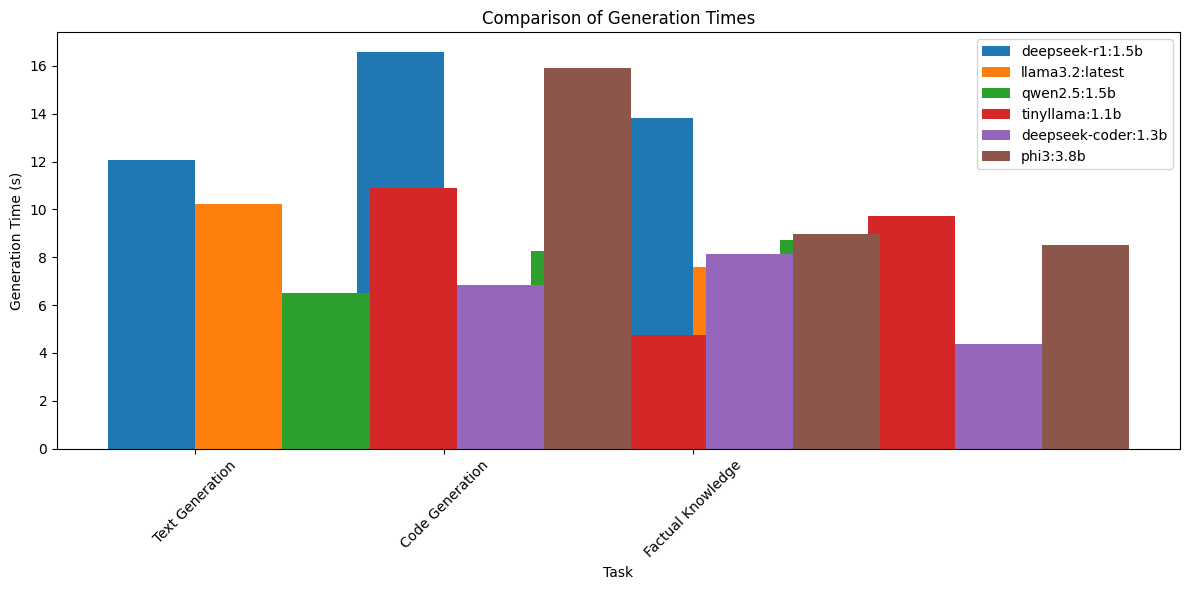

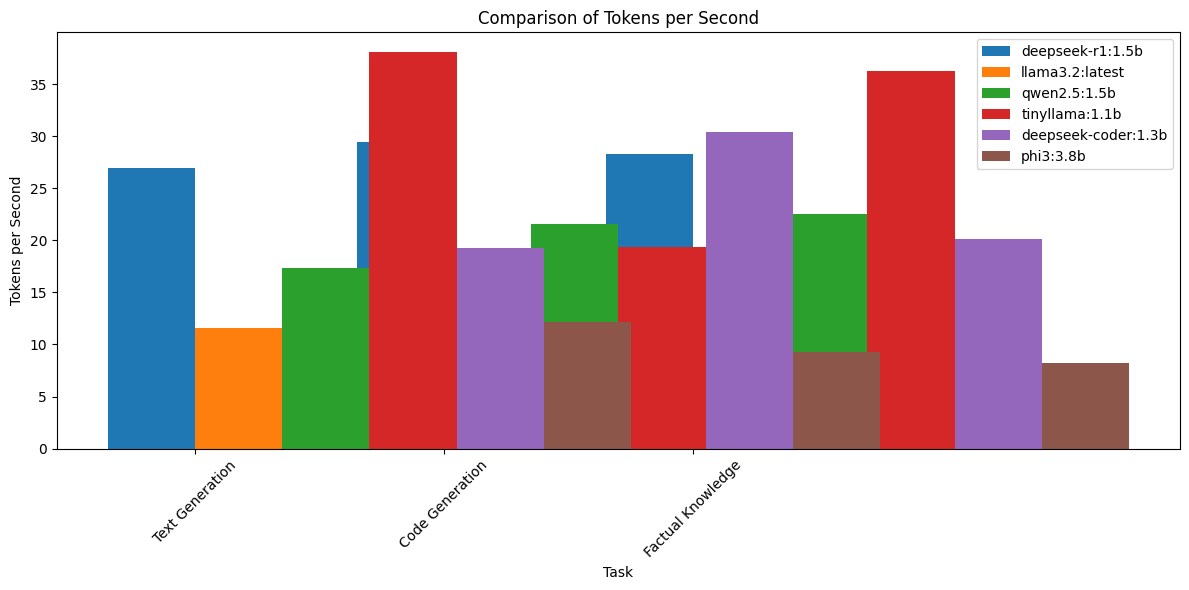


📊 Summary of Performance Metrics:


,Model,Generation Time (s),Tokens Generated,Tokens per Second
0,deepseek-coder:1.3b,6.454858,155.666667,23.247028
1,deepseek-r1:1.5b,14.157561,401.666667,28.239934
2,llama3.2:latest,7.748538,91.666667,11.728537
3,phi3:3.8b,11.127141,115.666667,9.893018
4,qwen2.5:1.5b,7.833207,162.666667,20.491425
5,tinyllama:1.1b,8.455896,286.666667,31.256481



📝 Qualitative Evaluation of Responses:

🔍 Task: Text Generation
Prompt: Write a short paragraph about AI.

🤖 deepseek-r1:1.5b Response:
<think>
Okay, so I need to write a short paragraph about AI. Hmm, where do I start? Well, first, I know that AI stands for Artificial Intelligence. It's all this stuff with machines learning and improving. But how do you even define it in one sentence?

I think the key point is what AI does. So maybe something like machines can process information faster than humans. That makes sense because AI uses algorithms to recognize patterns. Like, if I give it a photo, it can identify objects or analyze emotions from text.

Wait, but how about other types of intelligence? People can't be processed by an algorithm, right? So AI is separate from human intelligence. But in general, the focus is on machines learning and solving problems better than humans do.

Oh, I also remember that AI has applications beyond just processing data. It's used in creativity, like g

In [17]:
# Execute the benchmark 
# In the notebook only call to external function - no definition

# Run benchmark with the configured parameters
benchmark_results = run_benchmark_test(
    api_url=OLLAMA_API_URL,
    models=MODELS,
    tasks=BENCHMARK_TASKS,
    temperature=TEMPERATURE
)

# 🔬 Advanced Testing

For comprehensive model evaluation across different capabilities, use the **detailed_tests.ipynb** notebook:

## 📊 Available Detailed Tests:
- **🧠 Reasoning & Text Generation**: Logic, summarization, problem analysis
- **💻 Code Generation & Programming**: Multi-language coding challenges
- **🔢 Mathematical Problem Solving**: Algebra, geometry, probability, logic puzzles
- **🎨 Creative Writing & Storytelling**: Fiction, poetry, character development

## 🎯 Key Features:
- **Centralized Model Configuration**: Organized by capability (reasoning, coding, math, creative)
- **External Prompt Management**: All test prompts stored in `test_prompts.json`
- **PC-Optimized Models**: Selected for efficient local processing
- **Comprehensive Analysis**: Detailed performance insights and recommendations

## 🚀 Usage:
1. Open `detailed_tests.ipynb` for comprehensive testing
2. Modify `test_prompts.json` to customize test cases
3. Run specific test categories based on your needs

In [ ]:
# === BASIC ANALYSIS & RESULTS ===

def display_benchmark_results():
    """
    Display basic benchmark results and provide guidance for detailed testing
    """
    print("📊 BASIC BENCHMARK ANALYSIS")
    print("=" * 50)
    
    # Check if basic benchmark results are available
    if 'benchmark_results' in globals() and benchmark_results is not None:
        print(f"✅ Basic benchmark completed with {len(MODELS)} models")
        print(f"📝 Tested {len(BENCHMARK_TASKS)} basic tasks")
        
        # Display basic statistics
        print("\n🎯 BASIC RESULTS SUMMARY:")
        print(f"• Models tested: {', '.join(MODELS)}")
        print(f"• Tasks completed: {len(BENCHMARK_TASKS)}")
        print("• Results saved to CSV file")
        
        # Quick performance insights
        print("\n💡 QUICK INSIGHTS:")
        print("• Compare response times and quality in the results")
        print("• Look for consistency across different task types")
        print("• Consider model size vs. performance trade-offs")
        
    else:
        print("⚠️ No basic benchmark results available.")
        print("👆 Please run the benchmark cell above first.")
    
    # Guide to detailed testing
    print(f"\n🔬 FOR DETAILED TESTING:")
    print("📁 Open 'detailed_tests.ipynb' for comprehensive evaluations:")
    print("   • Reasoning & Text Generation Tests")
    print("   • Code Generation & Programming Tests") 
    print("   • Mathematical Problem Solving Tests")
    print("   • Creative Writing & Storytelling Tests")
    
    print(f"\n📋 TEST PROMPTS MANAGEMENT:")
    print("• All test prompts are stored in 'test_prompts.json'")
    print("• Edit the JSON file to customize test cases")
    print("• Both notebooks load prompts from this external file")
    
    print(f"\n🔧 CONFIGURATION:")
    print("• Centralized model configuration in both notebooks")
    print("• PC-optimized model selection for local processing")
    print("• Easy to modify model groups for different use cases")

# Display the results
display_benchmark_results()

print("\n" + "="*50)
print("🚀 NEXT STEPS:")
print("1. Review basic benchmark results above")
print("2. Open 'detailed_tests.ipynb' for comprehensive testing")
print("3. Modify 'test_prompts.json' to add custom test cases")
print("4. Adjust model configuration as needed for your system")
print("\n💾 All results are automatically saved to CSV files")
print("🔧 Centralized configuration ensures consistency across notebooks")